In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle


In [3]:
! cp /content/sample_data/kaggle.json ~/.kaggle/


In [4]:
! chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download alexattia/the-simpsons-characters-dataset



 99% 1.07G/1.08G [00:07<00:00, 149MB/s]
100% 1.08G/1.08G [00:07<00:00, 162MB/s]


In [6]:
! unzip the-simpsons-characters-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [7]:
! unzip /content/sample_data/newSet.zip

Archive:  /content/sample_data/newSet.zip
   creating: newSet/
  inflating: newSet/abraham_grampa_simpson_0.jpg  
  inflating: newSet/abraham_grampa_simpson_1.jpg  
  inflating: newSet/abraham_grampa_simpson_2.jpg  
  inflating: newSet/agnes_skinner_0.jpg  
  inflating: newSet/agnes_skinner_1.jpg  
  inflating: newSet/agnes_skinner_2.jpg  
  inflating: newSet/apu_nahasapeemapetilon_0.jpg  
  inflating: newSet/apu_nahasapeemapetilon_1.jpg  
  inflating: newSet/apu_nahasapeemapetilon_2.jpg  
  inflating: newSet/barney_gumble_0.jpg  
  inflating: newSet/barney_gumble_1.jpg  
  inflating: newSet/barney_gumble_2.jpg  
  inflating: newSet/bart_simpson_0.jpg  
  inflating: newSet/bart_simpson_1.jpg  
  inflating: newSet/bart_simpson_2.jpg  
  inflating: newSet/carl_carlson_0.jpg  
  inflating: newSet/carl_carlson_1.jpg  
  inflating: newSet/carl_carlson_2.jpg  
  inflating: newSet/charles_montgomery_burns_0.jpg  
  inflating: newSet/charles_montgomery_burns_1.jpg  
  inflating: newSet/charles

In [8]:
! rm -r simpsons_dataset/simpsons_dataset

In [9]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from tqdm import tqdm

# full_dataset = torchvision.datasets.ImageFolder(root="dataset/characters/", transform=transform)


In [11]:
#определим устройство, где проводить вычисления (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [12]:
import os
def get_list(dir):
  fil_names_lst =[]
  for root, dirs, files in os.walk(dir):  
      for filename in files:
          fil_names_lst.append(filename)
  fil_lst = sorted(fil_names_lst)
  return fil_lst
dir1 = get_list("/content/newSet")
dir2 = get_list("/content/kaggle_simpson_testset/kaggle_simpson_testset")


In [13]:
import shutil
dest = "/content/kaggle_simpson_testset/kaggle_simpson_testset"
for f_name in dir1:
  
    src = '/content/newSet/'+ f_name
    # print(dest)
    if f_name not in dir2:
      shutil.move(src, dest)

In [14]:
# импортируем модуль 
import splitfolders
 
# определяем путь к папке с исходными файлами
input_folder = "simpsons_dataset" 
 
# разбиваем датасет на папки с процентным соотношением числа файлов
splitfolders.ratio(input_folder, 'simpsons_dataset_splited', ratio = (0.9, 0.1), seed=13, group_prefix=None)


Copying files: 20933 files [00:03, 5802.73 files/s]


In [15]:

#функция для вывода изображений
def image_shower(images, labels, n=4):
    plt.figure(figsize=(12, 12))
    for i, image in enumerate(images[:n]):
        plt.subplot(n, n, i + 1)
        image = image/ 2 + 0.5
        plt.imshow(image.numpy().transpose((1, 2, 0)).squeeze())
    print("Real Labels: ", ' '.join('%5s' % classes[label] for label in labels[:n]))
# #имена классов
# classes = ("abraham_grampa_simpson", "agnes_skinner","apu_nahasapeemapetilon","barney_gumble",
#            "bart_simpson","carl_carlson","carl_carlson","charles_montgomery_burns","chief_wiggum",
#            "cletus_spuckler","comic_book_guy","disco_stu","edna_krabappel","fat_tony","gil",
#            "groundskeeper_willie","homer_simpson","kent_brockman","krusty_the_clown","lenny_leonard",
#            "lionel_hutz","lisa_simpson","maggie_simpson","marge_simpson","martin_prince","mayor_quimby",
#            "milhouse_van_houten","miss_hoover","moe_szyslak","ned_flanders","nelson_muntz","otto_mann",
#            "patty_bouvier","principal_skinner","professor_john_frink","rainier_wolfcastle","ralph_wiggum",
#            "selma_bouvier","sideshow_bob","sideshow_mel","snake_jailbird","troy_mcclure","waylon_smithers")

#путь до датасета
PATH_v = "/content/simpsons_dataset_splited/val"
PATH_train = "/content/simpsons_dataset_splited/train"
# PATH_test = "/content/kaggle_simpson_testset"
# print(len(classes))


In [16]:
# зададим какие преобразования необходимо сделать с каждым изображением
transform = transforms.Compose(
    [transforms.Resize((224,224)),  #изменим размер изображений
     transforms.ToTensor(),   #переведем в формат который необходим нейронной сети - тензор
     transforms.Normalize(mean=[0.0760, 0.1842, 0.2939], std=[0.4253, 0.3824, 0.4425])]) # проведем нормализацию изображения

#загружаем тренировочный и тестовый датасеты
# trainset = torchvision.datasets.ImageFolder(os.path.join(PATH, "train"), transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, num_workers=0, shuffle=True)

valset = torchvision.datasets.ImageFolder(root=PATH_v, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=224, num_workers=0, shuffle=True)

trainset = torchvision.datasets.ImageFolder(root=PATH_train, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=224, num_workers=0, shuffle=True)

# testset = torchvision.datasets.ImageFolder(root=PATH_test, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=224, num_workers=0, shuffle=True)
classes = valset.classes

In [17]:
import os

#Директория, где надо создать папки
path = '/content/kaggle_simpson_testset/kaggle_simpson_testset'
#название папки для создания
projectname_lst = classes
#Меняем директорию на path
chdir = os.chdir(path)
#Проверяю текущую директорию, нужно сделать правильную проверку директории через If
cur_dir = os.getcwd()

#Делаем функцию на создание папок, типа les_1, les_2 до les_55, через цикл.
def create_folder():
    for name in projectname_lst:  #делаем цикл до 55
        #print (i) # смотрим цикл
        os.mkdir(name) #создаем папки

#вызываем функцию 
create_folder()

In [18]:
f_lst = get_list("/content/kaggle_simpson_testset/kaggle_simpson_testset")

In [19]:
import shutil
for name in projectname_lst:
  dest = '/content/kaggle_simpson_testset/kaggle_simpson_testset/' + name 
  for f_name in f_lst:
    src = '/content/kaggle_simpson_testset/kaggle_simpson_testset/'+ f_name
    # print(dest)

    if name in f_name:
      shutil.move(src, dest)

In [20]:
# !find /content/kaggle_simpson_testset/kaggle_simpson_testset -type d -empty -delete

In [21]:

# len(classes)
# testset = torchvision.datasets.ImageFolder(os.path.join(PATH, "test"), transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=64, num_workers=0, shuffle=True)
testset = torchvision.datasets.ImageFolder(root="/content/kaggle_simpson_testset/kaggle_simpson_testset", transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=224, num_workers=0, shuffle=True)

Real Labels:  edna_krabappel moe_szyslak barney_gumble homer_simpson


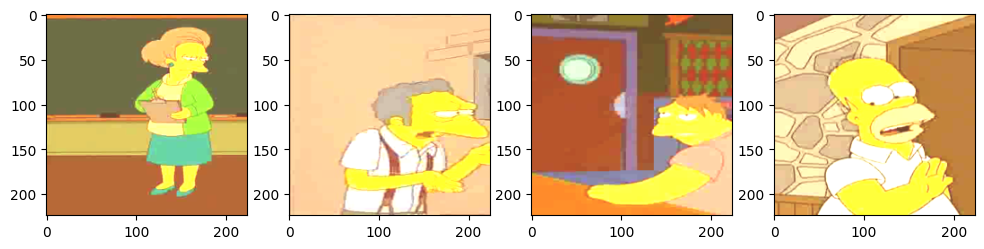

In [22]:
#Проверим как работает наш загрузчик и посмотрим на парочку изображений
images, labels = next(iter(trainloader))
image_shower(images, labels)

In [23]:
pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
from torch.nn.modules import BatchNorm2d
import torch.nn as nn
import torch.nn.functional as F
import torchinfo

class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        ) 
        self.conv1_dw = nn.Sequential(
                nn.Conv2d(32,32,kernel_size=3,groups=32,padding=1),
                nn.BatchNorm2d(32),
                nn.ReLU(),
                nn.Conv2d(32,32,kernel_size=1),
                nn.BatchNorm2d(32),
                nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        ) 
        self.conv2_dw = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=3,stride=2,groups=64,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64,128,kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        ) 
        self.conv3_dw = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=3,groups=128,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        ) 
        self.conv4_dw = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=3,groups=128,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(128,256,kernel_size=1,stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.conv5_dw = nn.Sequential(
            nn.Conv2d(256,256,kernel_size=3,groups=256,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.conv6 = nn.Sequential(
            nn.Conv2d(256,256,kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        ) 
        self.conv6_dw = nn.Sequential(
            nn.Conv2d(256,256,kernel_size=3,groups=256,stride=2,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256,256,kernel_size=1),
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.conv7 = nn.Sequential(
            nn.Conv2d(256,512,kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.conv7_dw = nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,groups=512,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512,512,kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.conv8 = nn.Sequential(
            nn.Conv2d(512,512,kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.conv8_dw = nn.Sequential(
            nn.Conv2d(512,512,kernel_size=3,groups=512,stride=2,padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Conv2d(512,512,kernel_size=1),
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.conv9 = nn.Sequential(
            nn.Conv2d(512,1024,kernel_size=1),
            nn.BatchNorm2d(1024),
            nn.ReLU()
        )
        self.conv9_dw = nn.Sequential(
            nn.Conv2d(1024,1024,kernel_size=3,groups=1024,padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Conv2d(1024,1024,kernel_size=1),
            nn.BatchNorm2d(1024),
        )
        self.conv10 = nn.Sequential(
            nn.Conv2d(1024,1024,kernel_size=1),
            nn.BatchNorm2d(1024),
            nn.ReLU()
        )
        self.avg_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1)
        )
        self.fc1 = nn.Sequential(
          
            nn.Flatten(),
            nn.Linear(1024,42)

        )


    def forward(self, x):
      x = self.conv1(x)
      x = self.conv1_dw(x)
      x = self.conv2(x)
      x = self.conv2_dw(x)
      x = self.conv3(x)
      x = self.conv3_dw(x)
      x = self.conv4(x)
      x = self.conv4_dw(x)
      x = self.conv5(x)
      x = self.conv5_dw(x)
      x = self.conv6(x)
      x = self.conv6_dw(x)
      x = self.conv7(x)
      x = self.conv7_dw(x)
      x = self.conv8(x)
      # x = self.conv7_dw(x)
      # x = self.conv8(x)
      # x = self.conv7_dw(x)
      # x = self.conv8(x)
      # x = self.conv7_dw(x)
      # x = self.conv8(x)
      # x = self.conv7_dw(x)
      # x = self.conv8(x)
      x = self.conv8_dw(x)
      x = self.conv9(x)
      x = self.conv9_dw(x)
      x = self.conv10(x)
      x = self.avg_pool(x)
      x = self.fc1(x)
      return x
net = Net().to(device)
inf = torchinfo.summary(net,(4,3,224,224),col_names=["input_size", "output_size", "num_params", "kernel_size"],row_settings=["var_names"])
inf

/usr/local/lib/python3.9/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.9/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Kernel Shape
Net (Net)                                [4, 3, 224, 224]          [4, 42]                   --                        --
├─Sequential (conv1)                     [4, 3, 224, 224]          [4, 32, 112, 112]         --                        --
│    └─Conv2d (0)                        [4, 3, 224, 224]          [4, 32, 112, 112]         896                       [3, 3]
│    └─BatchNorm2d (1)                   [4, 32, 112, 112]         [4, 32, 112, 112]         64                        --
│    └─ReLU (2)                          [4, 32, 112, 112]         [4, 32, 112, 112]         --                        --
├─Sequential (conv1_dw)                  [4, 32, 112, 112]         [4, 32, 112, 112]         --                        --
│    └─Conv2d (0)                        [4, 32, 112, 112]         [4, 32, 112, 112]         320                       [3, 3]
│    └

In [25]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [26]:
pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 11.2 MB/s eta 0:00:00


In [27]:
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassStatScores


In [28]:
def train_step(epoch):
    net.train()
    
    running_loss = 0.
    for images, labels in trainloader:
        images, labels = images.to(device),labels.to(device)
        # Удаляем накопленные ранее градиенты.
        # parameter.grad = 0
        optimizer.zero_grad()
        
        # Делаем проход (forward pass).
        # Состояние модели `train` обеспечивает сохранение промежуточных результатов вычислений.
        # Эти сохраненные значения будут использованы ниже для вычисления градиента функции потерь.
        output = net(images)
        
        # Вычисляем функцию потерь на основе предсказания модели.
        loss = criterion(output, labels)

        # Вычисляем градиент: направление, в котором функция потерь возрастает максимально быстро.
        # parameter.grad += dloss / dparameter
        loss.backward()

        # parameter += -lr * parameter.grad
        # 
        # PyTorch SGD:
        # velocity = momentum * velocity + parameter.grad
        # parameter += - lr * velocity
        optimizer.step()
        
        # Накапливаем статистику.
        running_loss += loss
    
    with torch.no_grad():
        train_loss = running_loss / len(trainloader)
    print(epoch,"\n train_loss: ",train_loss)
    return train_loss.item()


In [29]:
def valid_step(epoch):
    net.eval()
    acc = MulticlassAccuracy(num_classes=len(classes), average="micro")
    recall = MulticlassRecall(num_classes=len(classes), average="macro")
    precision = MulticlassPrecision(num_classes=len(classes), average="macro")
    acc.to(device)
    recall.to(device)
    precision.to(device)

    # correct_total = 0.
    running_loss = 0. 
    with torch.no_grad():
        for images, labels in valloader:
            images, labels = images.to(device),labels.to(device)
            output = net(images)
            acc.update(output, labels)
            recall.update(output, labels)
            precision.update(output, labels)


            # prediction = output.argmax(dim=1)
            # correct_total += prediction.eq(labels.view_as(prediction)).sum()
            
            loss = criterion(output, labels)
            running_loss += loss
    f1 = 2 *  ((recall.compute().item() * precision.compute().item()) / (recall.compute().item() + precision.compute().item())) *100
    valid_loss = running_loss / len(valloader)
    # accuracy = correct_total / len(valloader.dataset)
    print(epoch, "\n valid_loss: ",valid_loss.item()," acc: ",acc.compute().item()," recall: ",recall.compute().item(),
         " precision: ", precision.compute().item())
    print("f1: ",f1)
    return valid_loss.item(), acc.compute().item(),recall.compute().item(),precision.compute().item()
train_losses = []
valid_losses = []
valid_accs = []
valid_recs = []
valid_precs = []
lrs = []

In [32]:
# from torch.optim.lr_scheduler import StepLR
from torch.optim.lr_scheduler import MultiStepLR

epochs = 30
# scheduler = StepLR(optimizer, step_size=10, gamma=0.7)
scheduler = MultiStepLR(optimizer, milestones=[0,10], gamma=0.1)
# lmbda = lambda epoch: 0.95
# scheduler = ReduceLROnPlateau(optimizer, 'min',patience=3,threshold=0.001,eps=0.1)
# scheduler = MultiplicativeLR(optimizer, lr_lambda=lmbda)
# scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
for _ in (pbar := tqdm(range(epochs))):
    train_loss = train_step(_)
    valid_loss, valid_acc, valid_rec,valid_prec= valid_step(_)
    
    
    # lr = StepLR.get_last_lr(valid_loss)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    valid_accs.append(valid_acc)
    valid_recs.append(valid_rec)
    valid_precs.append(valid_prec)
    scheduler.step(valid_loss)
    # lrs.append(lr)
    
    pbar.set_description(f'Avg. train/valid loss: {train_loss:.4f}/{valid_loss:.4f}')

  0%|          | 0/30 [00:00<?, ?it/s]

0 
 train_loss:  tensor(0.3036, device='cuda:0')


/usr/local/lib/python3.9/dist-packages/torch/optim/lr_scheduler.py:152: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
Avg. train/valid loss: 0.3036/0.5125:   3%|▎         | 1/30 [02:01<58:57, 121.99s/it]

0 
 valid_loss:  0.5125377774238586  acc:  0.8627544045448303  recall:  0.5395512580871582  precision:  0.605343222618103
f1:  57.055685540022225
1 
 train_loss:  tensor(0.2951, device='cuda:0')


Avg. train/valid loss: 0.2951/0.5010:   7%|▋         | 2/30 [04:01<56:14, 120.51s/it]

1 
 valid_loss:  0.5009838938713074  acc:  0.8618078827857971  recall:  0.5350122451782227  precision:  0.5749245882034302
f1:  55.42508104821432
2 
 train_loss:  tensor(0.2776, device='cuda:0')


Avg. train/valid loss: 0.2776/0.5148:  10%|█         | 3/30 [06:02<54:19, 120.73s/it]

2 
 valid_loss:  0.5148414373397827  acc:  0.8655939698219299  recall:  0.5364745855331421  precision:  0.5978604555130005
f1:  56.5506536379573
3 
 train_loss:  tensor(0.2399, device='cuda:0')


Avg. train/valid loss: 0.2399/0.4893:  13%|█▎        | 4/30 [08:02<52:10, 120.39s/it]

3 
 valid_loss:  0.48925119638442993  acc:  0.8684335350990295  recall:  0.5406752824783325  precision:  0.614846408367157
f1:  57.53803812743
4 
 train_loss:  tensor(0.2204, device='cuda:0')


Avg. train/valid loss: 0.2204/0.4741:  17%|█▋        | 5/30 [10:02<50:06, 120.26s/it]

4 
 valid_loss:  0.47412973642349243  acc:  0.8717463612556458  recall:  0.5454655885696411  precision:  0.5986363291740417
f1:  57.08154362262733
5 
 train_loss:  tensor(0.2089, device='cuda:0')


Avg. train/valid loss: 0.2089/0.4798:  20%|██        | 6/30 [12:01<48:00, 120.03s/it]

5 
 valid_loss:  0.47976094484329224  acc:  0.8731661438941956  recall:  0.5572575330734253  precision:  0.6031486988067627
f1:  57.92956754961762
6 
 train_loss:  tensor(0.1903, device='cuda:0')


Avg. train/valid loss: 0.1903/0.4667:  23%|██▎       | 7/30 [14:01<45:58, 119.93s/it]

6 
 valid_loss:  0.4666859805583954  acc:  0.8722196221351624  recall:  0.5634244084358215  precision:  0.6013010144233704
f1:  58.17468421212683
7 
 train_loss:  tensor(0.1850, device='cuda:0')


Avg. train/valid loss: 0.1850/0.4723:  27%|██▋       | 8/30 [15:59<43:41, 119.14s/it]

7 
 valid_loss:  0.47227421402931213  acc:  0.8755323886871338  recall:  0.5629947781562805  precision:  0.6366899013519287
f1:  59.757884032146706
8 
 train_loss:  tensor(0.1648, device='cuda:0')


Avg. train/valid loss: 0.1648/0.4744:  30%|███       | 9/30 [17:56<41:29, 118.53s/it]

8 
 valid_loss:  0.4743673503398895  acc:  0.8793184757232666  recall:  0.5661263465881348  precision:  0.6097744107246399
f1:  58.714029604906834
9 
 train_loss:  tensor(0.1608, device='cuda:0')


Avg. train/valid loss: 0.1608/0.4787:  33%|███▎      | 10/30 [19:55<39:31, 118.60s/it]

9 
 valid_loss:  0.4786570966243744  acc:  0.876478910446167  recall:  0.5762710571289062  precision:  0.6762495636940002
f1:  62.22700759958237
10 
 train_loss:  tensor(0.1703, device='cuda:0')


Avg. train/valid loss: 0.1703/0.4809:  37%|███▋      | 11/30 [21:52<37:28, 118.34s/it]

10 
 valid_loss:  0.4808742105960846  acc:  0.8774254322052002  recall:  0.5881264805793762  precision:  0.6635592579841614
f1:  62.35698930339409
11 
 train_loss:  tensor(0.1699, device='cuda:0')


Avg. train/valid loss: 0.1699/0.4709:  40%|████      | 12/30 [23:50<35:27, 118.20s/it]

11 
 valid_loss:  0.4709455072879791  acc:  0.8750591278076172  recall:  0.5833261609077454  precision:  0.6687288284301758
f1:  62.31148368056652
12 
 train_loss:  tensor(0.1863, device='cuda:0')


Avg. train/valid loss: 0.1863/0.4743:  43%|████▎     | 13/30 [25:48<33:25, 117.95s/it]

12 
 valid_loss:  0.4742937684059143  acc:  0.8774254322052002  recall:  0.5872589349746704  precision:  0.6916626691818237
f1:  63.51993447375577
13 
 train_loss:  tensor(0.1597, device='cuda:0')


Avg. train/valid loss: 0.1597/0.4618:  47%|████▋     | 14/30 [27:44<31:21, 117.62s/it]

13 
 valid_loss:  0.4617709219455719  acc:  0.8769521713256836  recall:  0.5896642208099365  precision:  0.6892072558403015
f1:  63.5561691556553
14 
 train_loss:  tensor(0.1328, device='cuda:0')


Avg. train/valid loss: 0.1328/0.4567:  50%|█████     | 15/30 [29:42<29:24, 117.60s/it]

14 
 valid_loss:  0.4566970765590668  acc:  0.8802649974822998  recall:  0.585723876953125  precision:  0.6771652698516846
f1:  62.813409743688396
15 
 train_loss:  tensor(0.1221, device='cuda:0')


Avg. train/valid loss: 0.1221/0.4748:  53%|█████▎    | 16/30 [31:39<27:22, 117.34s/it]

15 
 valid_loss:  0.4748276174068451  acc:  0.881211519241333  recall:  0.5814290046691895  precision:  0.6620610952377319
f1:  61.913082164961644
16 
 train_loss:  tensor(0.1188, device='cuda:0')


Avg. train/valid loss: 0.1188/0.4618:  57%|█████▋    | 17/30 [33:35<25:21, 117.01s/it]

16 
 valid_loss:  0.4618338644504547  acc:  0.8778986930847168  recall:  0.5969394445419312  precision:  0.6882141828536987
f1:  63.93355366721396
17 
 train_loss:  tensor(0.1235, device='cuda:0')


Avg. train/valid loss: 0.1235/0.4669:  60%|██████    | 18/30 [35:32<23:24, 117.04s/it]

17 
 valid_loss:  0.4669303596019745  acc:  0.8793184757232666  recall:  0.5968273878097534  precision:  0.6530479192733765
f1:  62.36732281464315
18 
 train_loss:  tensor(0.1264, device='cuda:0')


Avg. train/valid loss: 0.1264/0.4561:  63%|██████▎   | 19/30 [37:29<21:27, 117.03s/it]

18 
 valid_loss:  0.45606598258018494  acc:  0.87884521484375  recall:  0.6080832481384277  precision:  0.694369912147522
f1:  64.83683628139985
19 
 train_loss:  tensor(0.1163, device='cuda:0')


Avg. train/valid loss: 0.1163/0.4701:  67%|██████▋   | 20/30 [39:25<19:28, 116.85s/it]

19 
 valid_loss:  0.47013020515441895  acc:  0.881211519241333  recall:  0.5924427509307861  precision:  0.660041332244873
f1:  62.44178394853601
20 
 train_loss:  tensor(0.1047, device='cuda:0')


Avg. train/valid loss: 0.1047/0.4510:  70%|███████   | 21/30 [41:22<17:31, 116.87s/it]

20 
 valid_loss:  0.45103883743286133  acc:  0.8878371715545654  recall:  0.6174497604370117  precision:  0.7189859747886658
f1:  66.43607413204458
21 
 train_loss:  tensor(0.1113, device='cuda:0')


Avg. train/valid loss: 0.1113/0.4708:  73%|███████▎  | 22/30 [43:20<15:36, 117.06s/it]

21 
 valid_loss:  0.47077497839927673  acc:  0.8840510845184326  recall:  0.6104317903518677  precision:  0.7078266739845276
f1:  65.55313931956277
22 
 train_loss:  tensor(0.1034, device='cuda:0')


Avg. train/valid loss: 0.1034/0.4565:  77%|███████▋  | 23/30 [45:17<13:39, 117.06s/it]

22 
 valid_loss:  0.4565165042877197  acc:  0.8864173889160156  recall:  0.6146436333656311  precision:  0.7050524950027466
f1:  65.67512292057364
23 
 train_loss:  tensor(0.0966, device='cuda:0')


Avg. train/valid loss: 0.0966/0.4576:  80%|████████  | 24/30 [47:14<11:42, 117.16s/it]

23 
 valid_loss:  0.45763131976127625  acc:  0.8831045627593994  recall:  0.6128048896789551  precision:  0.6925317049026489
f1:  65.02335363670304
24 
 train_loss:  tensor(0.1179, device='cuda:0')


Avg. train/valid loss: 0.1179/0.4770:  83%|████████▎ | 25/30 [49:12<09:46, 117.21s/it]

24 
 valid_loss:  0.47697535157203674  acc:  0.8793184757232666  recall:  0.6058589220046997  precision:  0.687568724155426
f1:  64.41328933360097
25 
 train_loss:  tensor(0.1047, device='cuda:0')


Avg. train/valid loss: 0.1047/0.4700:  87%|████████▋ | 26/30 [51:09<07:48, 117.17s/it]

25 
 valid_loss:  0.4699987471103668  acc:  0.8793184757232666  recall:  0.6089078187942505  precision:  0.6822291016578674
f1:  64.34865700579411
26 
 train_loss:  tensor(0.1029, device='cuda:0')


Avg. train/valid loss: 0.1029/0.4415:  90%|█████████ | 27/30 [53:06<05:51, 117.20s/it]

26 
 valid_loss:  0.44147181510925293  acc:  0.8854708671569824  recall:  0.6132968664169312  precision:  0.6856578588485718
f1:  64.74618523444227
27 
 train_loss:  tensor(0.0845, device='cuda:0')


Avg. train/valid loss: 0.0845/0.4614:  93%|█████████▎| 28/30 [55:03<03:54, 117.10s/it]

27 
 valid_loss:  0.4614293575286865  acc:  0.8854708671569824  recall:  0.6205884218215942  precision:  0.7139086127281189
f1:  66.39856182929309
28 
 train_loss:  tensor(0.0741, device='cuda:0')


Avg. train/valid loss: 0.0741/0.4536:  97%|█████████▋| 29/30 [57:00<01:57, 117.03s/it]

28 
 valid_loss:  0.45361730456352234  acc:  0.8887836933135986  recall:  0.6315819621086121  precision:  0.695439338684082
f1:  66.1974215170829
29 
 train_loss:  tensor(0.0822, device='cuda:0')


Avg. train/valid loss: 0.0822/0.4492: 100%|██████████| 30/30 [58:57<00:00, 117.92s/it]

29 
 valid_loss:  0.4492035508155823  acc:  0.8878371715545654  recall:  0.6406188607215881  precision:  0.7187047004699707
f1:  67.74189744886502


Text(0, 0.5, 'Loss')

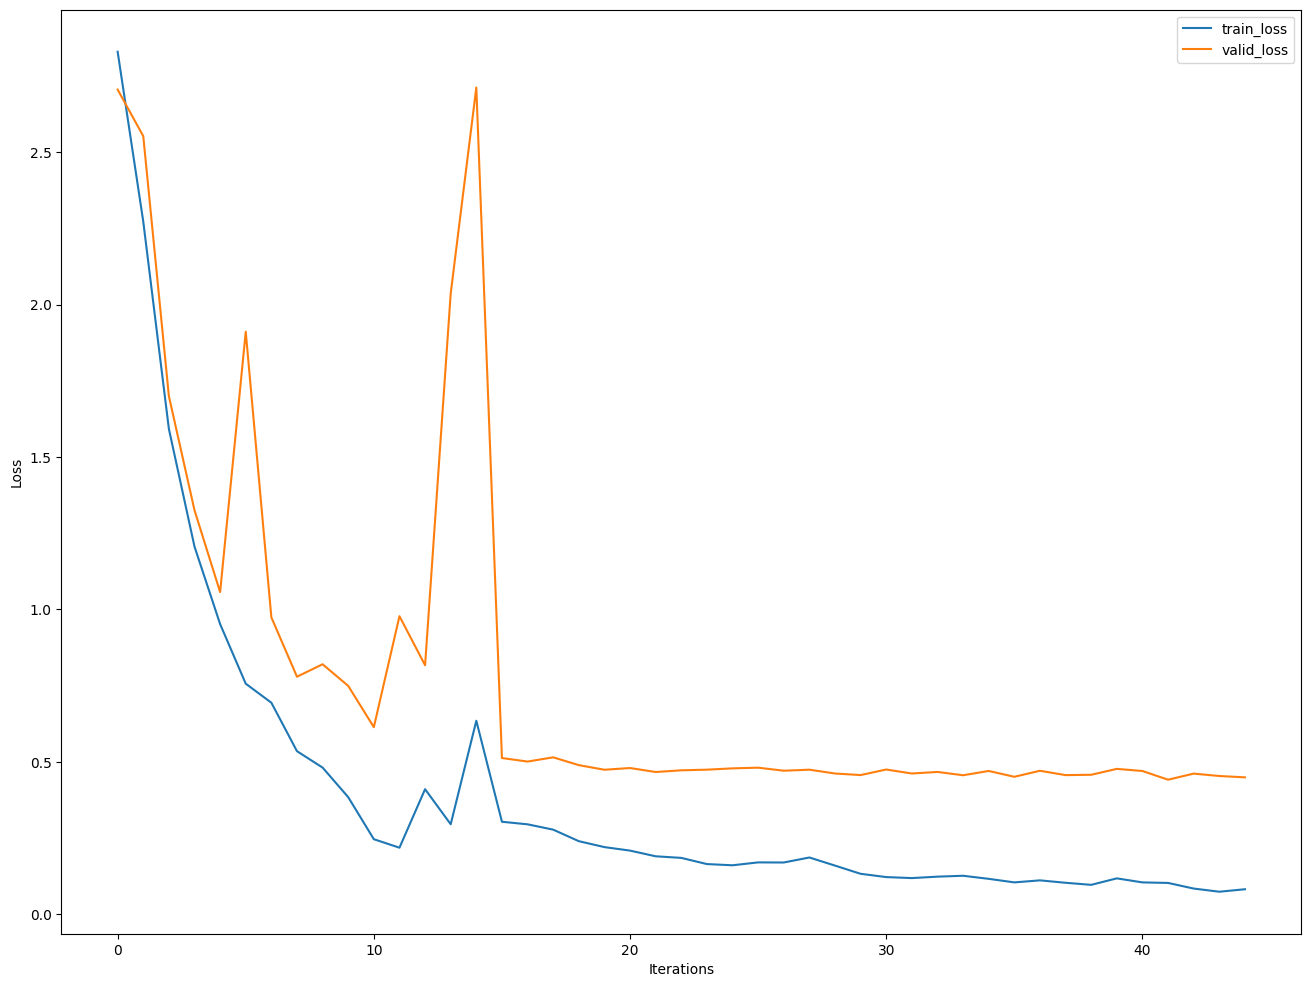

In [33]:
fig = plt.figure(figsize=(16, 12))

plt.plot(train_losses[1:], label='train_loss')
plt.plot(valid_losses[1:], label='valid_loss')
# plt.plot(lr[1:], label='lr')


plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

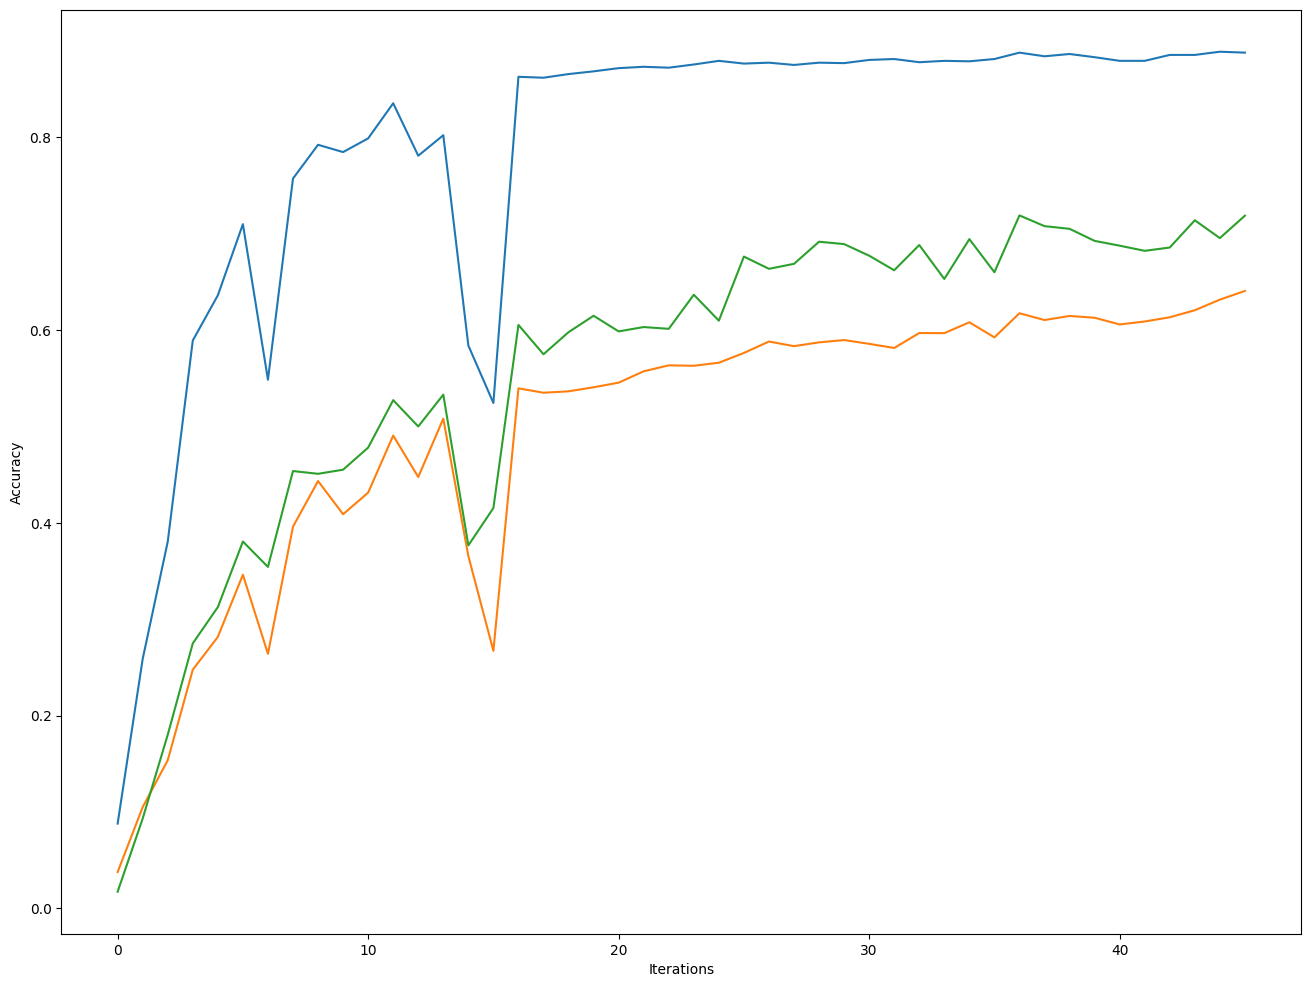

In [34]:
fig = plt.figure(figsize=(16, 12))

# plt.plot(valid_accs)
plt.plot(valid_accs, label='valid_acc')
plt.plot(valid_recs, label='valid_rec')
plt.plot(valid_precs, label='valid_prec')
plt.plot(lrs, label='lr')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

In [35]:
# for epoch in range(15):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data[0].to(device),data[1].to(device)

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         # if i % 100 == 99:    # print every 2000 mini-batches
#         #     print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
#         #     running_loss = 0.0
#         with torch.no_grad():
#           train_loss = running_loss/len(trainloader)
#     print(epoch," train loss:",train_loss)
# print('Finished Training')

Real Labels:  comic_book_guy apu_nahasapeemapetilon homer_simpson apu_nahasapeemapetilon


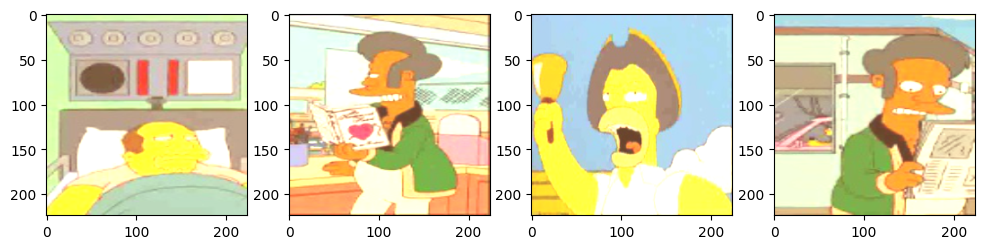

In [36]:
images, labels = next(iter(testloader))
image_shower(images, labels)

In [37]:
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  comic_book_guy apu_nahasapeemapetilon homer_simpson apu_nahasapeemapetilon


In [38]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        # outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 94 %


In [39]:
recall = MulticlassRecall(num_classes=len(classes), average="macro")
precision = MulticlassPrecision(num_classes=len(classes), average="macro")
recall.to(device)
precision.to(device)
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        # outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        # outputs = net(images)
        # acc.update(output, labels)
        recall.update(outputs, labels)
        precision.update(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)

        

print(f'f1: {100 * 2 *  (recall.compute().item() * precision.compute().item()) / (recall.compute().item() + precision.compute().item())} %')

f1: 53.0440254139955 %
